In [1]:
import pandas as pd
print(pd.__version__)


2.2.3


All CSV files contain valid data.


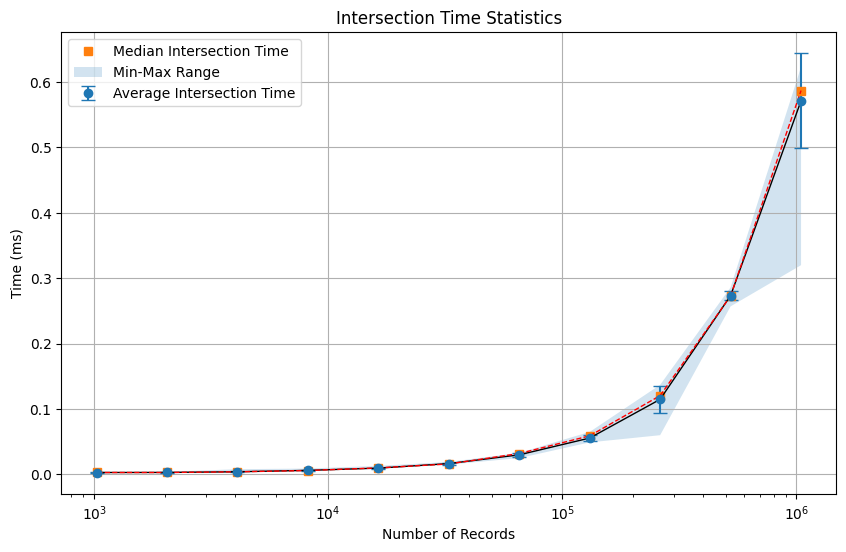

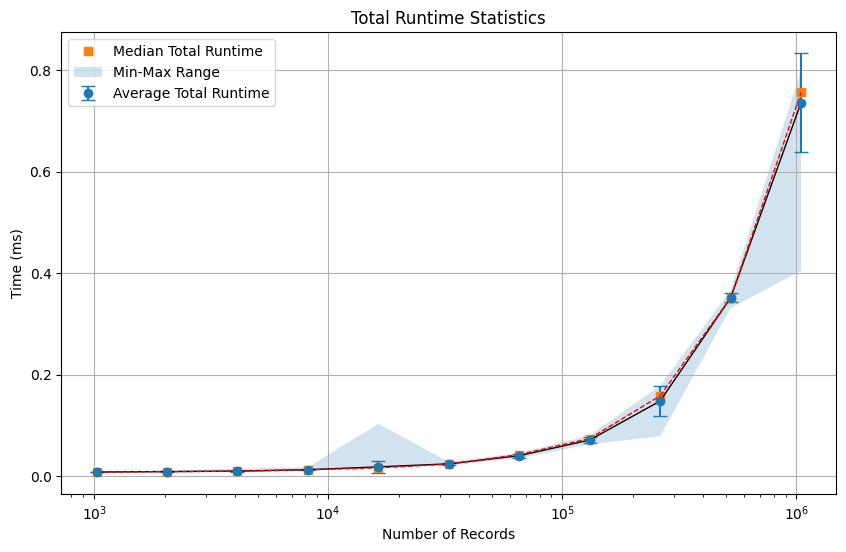

In [8]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

# Set the directory where your CSV files are located.
csv_dir = "/Users/nirajankoirala/Desktop/SGX-Biometrics-Privacy/PP_record_linkage/data/"
csv_pattern = csv_dir + "sender_results_*.csv"

# Get a sorted list of CSV files matching the pattern
csv_files = sorted(glob.glob(csv_pattern))

# Check for empty or malformed CSV files
empty_files = []
valid_files = []

for file in csv_files:
    try:
        df = pd.read_csv(file)
        if df.empty:
            empty_files.append(file)
        else:
            valid_files.append(file)
    except Exception as e:
        print(f"Error reading {file}: {e}")
        empty_files.append(file)

if empty_files:
    print("Warning: The following CSV files are empty or have issues:")
    for f in empty_files:
        print(f" - {f}")
else:
    print("All CSV files contain valid data.")

# Initialize lists to store the number of records and computed statistics
num_records = []  # extracted from filename

# For intersection_time statistics:
intersection_avg    = []
intersection_min    = []
intersection_max    = []
intersection_std    = []
intersection_median = []

# For total_runtime statistics:
total_avg    = []
total_min    = []
total_max    = []
total_std    = []
total_median = []

# Process each valid CSV file
for file in valid_files:
    df = pd.read_csv(file)
    
    # Ensure the required columns exist
    required_columns = {"intersection_time", "total_runtime"}
    if not required_columns.issubset(df.columns):
        print(f"Skipping {file} - Missing required columns.")
        continue

    # Extract the number of records from the filename.
    # For example, "sender_results_1024.csv" will yield 1024.
    try:
        num = int(file.split("_")[-1].split(".")[0])
        num_records.append(num)
    except ValueError:
        print(f"Skipping {file} - Could not extract record number.")
        continue

    # Compute statistics for intersection_time
    itime = df["intersection_time"]
    intersection_avg.append(itime.mean())
    intersection_min.append(itime.min())
    intersection_max.append(itime.max())
    intersection_std.append(itime.std())
    intersection_median.append(itime.median())

    # Compute statistics for total_runtime
    truntime = df["total_runtime"]
    total_avg.append(truntime.mean())
    total_min.append(truntime.min())
    total_max.append(truntime.max())
    total_std.append(truntime.std())
    total_median.append(truntime.median())

# If desired, sort all lists by num_records so the trend is clear.
# (This step is optional if your valid_files are already sorted numerically.)
sorted_data = sorted(zip(num_records, intersection_avg, intersection_min, intersection_max,
                           intersection_std, intersection_median, total_avg, total_min, total_max,
                           total_std, total_median), key=lambda x: x[0])
(num_records, 
 intersection_avg, intersection_min, intersection_max, intersection_std, intersection_median, 
 total_avg, total_min, total_max, total_std, total_median) = map(list, zip(*sorted_data))

# ----------------------------
# Plot Intersection Time Statistics
# ----------------------------
plt.figure(figsize=(10, 6))

# Plot average intersection time with markers and error bars (no automatic connecting line)
plt.errorbar(num_records, intersection_avg, yerr=intersection_std, fmt='o', capsize=5,
             label='Average Intersection Time')

# Plot median values as markers (without connecting lines)
plt.plot(num_records, intersection_median, 's', label='Median Intersection Time')

# Draw line segments connecting each pair of adjacent points.
for i in range(len(num_records) - 1):
    # Connect average values with a solid line (you can adjust the style if desired)
    plt.plot(num_records[i:i+2], intersection_avg[i:i+2], 'k-', lw=1)
    # Optionally, also connect the median markers with a dashed line:
    plt.plot(num_records[i:i+2], intersection_median[i:i+2], 'r--', lw=1)

# Shade the area between the minimum and maximum values
plt.fill_between(num_records, intersection_min, intersection_max, alpha=0.2,
                 label='Min-Max Range')

plt.xscale('log')  # Use logarithmic scale if record counts vary widely
plt.xlabel('Number of Records')
plt.ylabel('Time (ms)')
plt.title('Intersection Time Statistics')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# Plot Total Runtime Statistics
# ----------------------------
plt.figure(figsize=(10, 6))

# Plot average total runtime with markers and error bars
plt.errorbar(num_records, total_avg, yerr=total_std, fmt='o', capsize=5,
             label='Average Total Runtime')

# Plot median total runtime as markers
plt.plot(num_records, total_median, 's', label='Median Total Runtime')

# Draw line segments connecting adjacent points
for i in range(len(num_records) - 1):
    plt.plot(num_records[i:i+2], total_avg[i:i+2], 'k-', lw=1)
    plt.plot(num_records[i:i+2], total_median[i:i+2], 'r--', lw=1)

# Shade the area between the minimum and maximum values
plt.fill_between(num_records, total_min, total_max, alpha=0.2, label='Min-Max Range')

plt.xscale('log')
plt.xlabel('Number of Records')
plt.ylabel('Time (ms)')
plt.title('Total Runtime Statistics')
plt.legend()
plt.grid(True)
plt.show()
